In [1]:
print("Member of group :")
print("        Adhyatma Chrysostomos Davu-103012340479")
print("        Dionisius Felysto Bagastama-103012340459")
print("        Nazario Jose Valente da Cruz-103012350552")

print("DataSet :")
print("      used car data")

Member of group :
        Adhyatma Chrysostomos Davu-103012340479
        Dionisius Felysto Bagastama-103012340459
        Nazario Jose Valente da Cruz-103012350552
DataSet :
      used car data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv(r'D:\COURSE\SEMESTER4\DKA\DKA\CAR_DETAILS_FROM_CAR_DEKHO.csv')

df = df.rename(columns={
    'name': 'Car_Name',
    'year': 'Year',
    'selling_price': 'Selling_Price',
    'km_driven': 'Km_Driven',
    'fuel': 'Fuel_Type'
})
df['Car_Age'] = 2025 - df['Year']
df = df[['Car_Age', 'Km_Driven', 'Fuel_Type', 'Selling_Price']]
df = df.dropna()
df = df[df['Selling_Price'] > 0]
fuel_map = {'Petrol': 1, 'Diesel': 2, 'CNG': 3}
df = df[df['Fuel_Type'].isin(fuel_map.keys())]
df['Fuel_Type_Encoded'] = df['Fuel_Type'].map(fuel_map)
final_df = df[['Car_Age', 'Km_Driven', 'Fuel_Type_Encoded', 'Selling_Price']]

# Print Dataset Info
print("Sample of cleaned dataset:")
display(df.head())

Sample of cleaned dataset:


,Car_Age,Km_Driven,Fuel_Type,Selling_Price,Fuel_Type_Encoded
0,18,70000,Petrol,60000,1
1,18,50000,Petrol,135000,1
2,13,100000,Diesel,600000,2
3,8,46000,Petrol,250000,1
4,11,141000,Diesel,450000,2


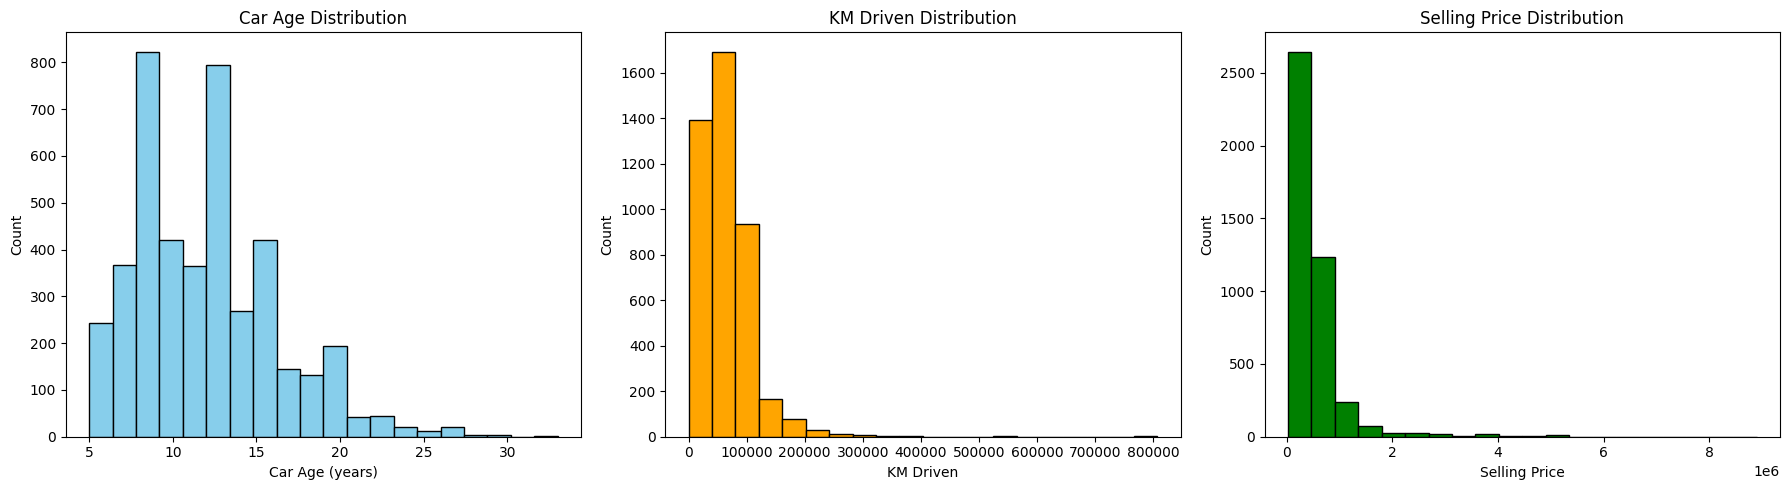

In [4]:
# DISTRIBUTION VISUALIZATION 
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].hist(final_df['Car_Age'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title("Car Age Distribution")
axs[0].set_xlabel("Car Age (years)")
axs[0].set_ylabel("Count")

axs[1].hist(final_df['Km_Driven'], bins=20, color='orange', edgecolor='black')
axs[1].set_title("KM Driven Distribution")
axs[1].set_xlabel("KM Driven")
axs[1].set_ylabel("Count")

axs[2].hist(final_df['Selling_Price'], bins=20, color='green', edgecolor='black')
axs[2].set_title("Selling Price Distribution")
axs[2].set_xlabel("Selling Price")
axs[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [5]:
# CALCULATE FUZZY BREAKPOINTS
def get_percentiles(series):
    p0 = series.min()
    p33 = np.percentile(series, 33)
    p66 = np.percentile(series, 66)
    p100 = series.max()
    return p0, p33, p66, p100

age_p0, age_p33, age_p66, age_p100 = get_percentiles(final_df['Car_Age'])
km_p0, km_p33, km_p66, km_p100 = get_percentiles(final_df['Km_Driven'])
price_p0, price_p33, price_p66, price_p100 = get_percentiles(final_df['Selling_Price'])

In [6]:
# MEMBERSHIP FUNCTIONS
def age_low(x):
    if x <= age_p33:
        return 1
    elif age_p33 < x < age_p66:
        return (age_p66 - x) / (age_p66 - age_p33)
    else:
        return 0

def age_med(x):
    if age_p33 < x < age_p66:
        return (x - age_p33) / (age_p66 - age_p33)
    elif age_p66 <= x < age_p100:
        return (age_p100 - x) / (age_p100 - age_p66)
    else:
        return 0

def age_high(x):
    if x <= age_p66:
        return 0
    elif age_p66 < x < age_p100:
        return (x - age_p66) / (age_p100 - age_p66)
    else:
        return 1

def km_low(x):
    if x <= km_p33:
        return 1
    elif km_p33 < x < km_p66:
        return (km_p66 - x) / (km_p66 - km_p33)
    else:
        return 0

def km_med(x):
    if km_p33 < x < km_p66:
        return (x - km_p33) / (km_p66 - km_p33)
    elif km_p66 <= x < km_p100:
        return (km_p100 - x) / (km_p100 - km_p66)
    else:
        return 0

def km_high(x):
    if x <= km_p66:
        return 0
    elif km_p66 < x < km_p100:
        return (x - km_p66) / (km_p100 - km_p66)
    else:
        return 1

def sp_low(x):
    if x <= price_p33:
        return 1
    elif price_p33 < x < price_p66:
        return (price_p66 - x) / (price_p66 - price_p33)
    else:
        return 0

def sp_med(x):
    if price_p33 < x < price_p66:
        return (x - price_p33) / (price_p66 - price_p33)
    elif price_p66 <= x < price_p100:
        return (price_p100 - x) / (price_p100 - price_p66)
    else:
        return 0

def sp_high(x):
    if x <= price_p66:
        return 0
    elif price_p66 < x < price_p100:
        return (x - price_p66) / (price_p100 - price_p66)
    else:
        return 1

def deal_bad(z): return 1 if z <= 0.4 else (0.6 - z) / 0.2 if z <= 0.6 else 0
def deal_fair(z): 
    if 0.4 <= z <= 0.6: return (z - 0.4) / 0.2
    elif 0.6 < z <= 0.8: return (0.8 - z) / 0.2
    else: return 0
def deal_good(z): return 0 if z <= 0.6 else (z - 0.6) / 0.2 if z <= 0.8 else 1

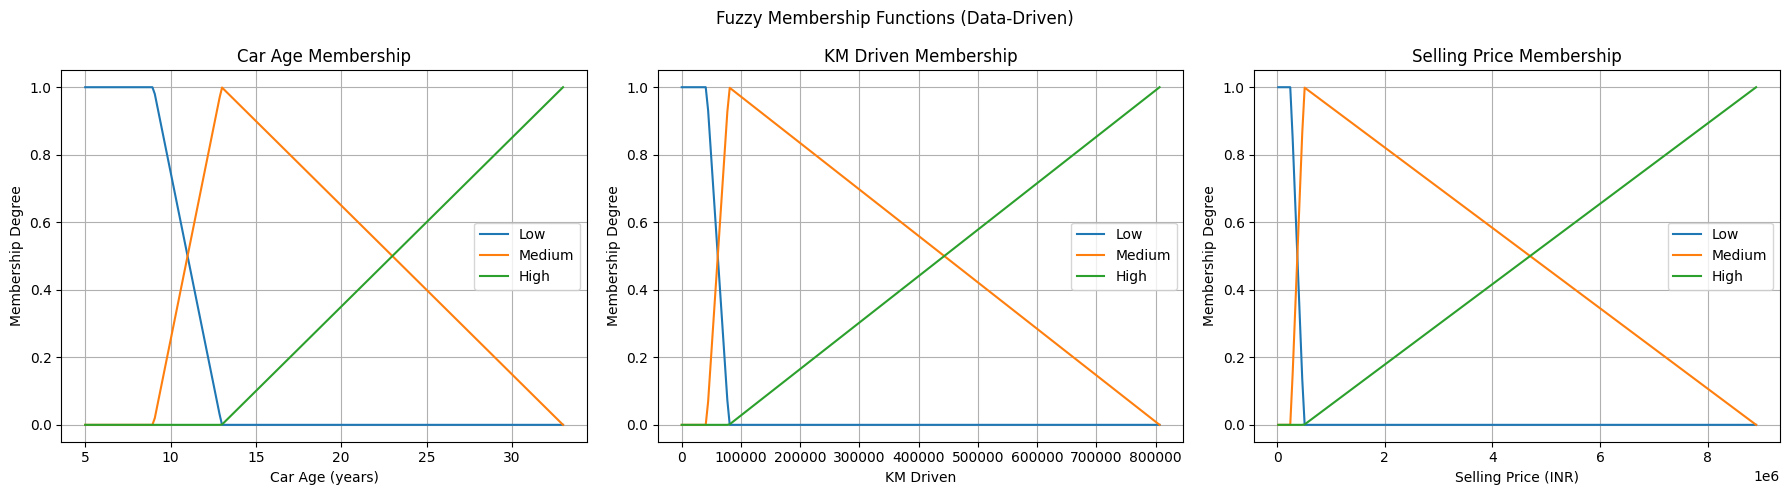

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Car Age membership
age_range = np.linspace(age_p0, age_p100, 200)
axs[0].plot(age_range, [age_low(x) for x in age_range], label='Low')
axs[0].plot(age_range, [age_med(x) for x in age_range], label='Medium')
axs[0].plot(age_range, [age_high(x) for x in age_range], label='High')
axs[0].set_title("Car Age Membership")
axs[0].set_xlabel("Car Age (years)")
axs[0].set_ylabel("Membership Degree")
axs[0].legend()
axs[0].grid(True)

# KM Driven membership
km_range = np.linspace(km_p0, km_p100, 200)
axs[1].plot(km_range, [km_low(x) for x in km_range], label='Low')
axs[1].plot(km_range, [km_med(x) for x in km_range], label='Medium')
axs[1].plot(km_range, [km_high(x) for x in km_range], label='High')
axs[1].set_title("KM Driven Membership")
axs[1].set_xlabel("KM Driven")
axs[1].set_ylabel("Membership Degree")
axs[1].legend()
axs[1].grid(True)

# Selling Price membership
price_range = np.linspace(price_p0, price_p100, 200)
axs[2].plot(price_range, [sp_low(x) for x in price_range], label='Low')
axs[2].plot(price_range, [sp_med(x) for x in price_range], label='Medium')
axs[2].plot(price_range, [sp_high(x) for x in price_range], label='High')
axs[2].set_title("Selling Price Membership")
axs[2].set_xlabel("Selling Price (INR)")
axs[2].set_ylabel("Membership Degree")
axs[2].legend()
axs[2].grid(True)

plt.suptitle("Fuzzy Membership Functions (Data-Driven)")
plt.tight_layout()
plt.show()


In [8]:
def manual_mamdani_predict(car_age, km_driven, selling_price, fuel_type):
    # 1) Fuzzify inputs
    age_fz = {
        'low':    age_low(car_age),
        'medium': age_med(car_age),
        'high':   age_high(car_age)
    }
    km_fz  = {
        'low':    km_low(km_driven),
        'medium': km_med(km_driven),
        'high':   km_high(km_driven)
    }
    sp_fz  = {
        'low':    sp_low(selling_price),
        'medium': sp_med(selling_price),
        'high':   sp_high(selling_price)
    }

    # 2) Build rules with 3‐way AND (min) and price overrides
    rules = []
    if fuel_type in (1, 2):  # Petrol or Diesel
        # Core rules: all three must agree
        rules.append(('bad',  min(age_fz['high'],   km_fz['high'],   sp_fz['high'])))
        rules.append(('fair', min(age_fz['medium'], km_fz['medium'], sp_fz['medium'])))
        rules.append(('good', min(age_fz['low'],    km_fz['low'],    sp_fz['low'])))
    else:  # CNG
        rules.append(('bad',  min(age_fz['high'],   km_fz['medium'], sp_fz['high'])))
        rules.append(('fair', min(age_fz['medium'], km_fz['low'],    sp_fz['medium'])))
        rules.append(('good', min(age_fz['low'],    km_fz['low'],    sp_fz['low'])))
        
    # If price is very low => boost "good"
    rules.append(('good', sp_fz['low']))
    # If price is very high => boost "bad"
    rules.append(('bad',  sp_fz['high']))

    # 3) Aggregate + Defuzzify (centroid)
    z_vals  = np.linspace(0, 1, 200)
    mu_bad  = np.zeros_like(z_vals)
    mu_fair = np.zeros_like(z_vals)
    mu_good = np.zeros_like(z_vals)

    for label, strength in rules:
        for i, z in enumerate(z_vals):
            if label == 'bad':
                mu_bad[i]  = max(mu_bad[i],  min(strength, deal_bad(z)))
            elif label == 'fair':
                mu_fair[i] = max(mu_fair[i], min(strength, deal_fair(z)))
            elif label == 'good':
                mu_good[i] = max(mu_good[i], min(strength, deal_good(z)))

    mu_agg = np.maximum.reduce([mu_bad, mu_fair, mu_good])
    if mu_agg.sum() == 0:
        return 0.0
    return (z_vals * mu_agg).sum() / mu_agg.sum()

In [9]:
def manual_sugeno_predict(car_age, km_driven, selling_price, fuel_type):
    # 1) Fuzzify inputs
    age_fz = {
        'low':    age_low(car_age),
        'medium': age_med(car_age),
        'high':   age_high(car_age)
    }
    km_fz = {
        'low':    km_low(km_driven),
        'medium': km_med(km_driven),
        'high':   km_high(km_driven)
    }
    sp_fz = {
        'low':    sp_low(selling_price),
        'medium': sp_med(selling_price),
        'high':   sp_high(selling_price)
    }

    # 2) Compute firing strengths via triple‐input AND (min)
    weights = [
        min(age_fz['low'],    km_fz['low'],    sp_fz['low']),
        min(age_fz['medium'], km_fz['medium'], sp_fz['medium']),
        min(age_fz['high'],   km_fz['high'],   sp_fz['high'])
    ]

    # 3) Define rule‐output coefficients per fuel type
    if fuel_type == 1:       # Petrol
        coeffs = [(0.2, 0.00001), (0.6, 0.00001), (0.8, 0.00001)]
    elif fuel_type == 2:     # Diesel
        coeffs = [(0.3, 0.00001), (0.6, 0.00001), (0.9, 0.00001)]
    else:                    # CNG
        coeffs = [(0.4, 0.00001), (0.7, 0.00001), (0.95,0.00001)]

    # 4) Compute each rule's crisp output: z_i = a*age + b*km
    outputs = [a * car_age + b * km_driven for (a, b) in coeffs]

    # 5) Aggregate by weighted average
    numerator   = sum(w * z for w, z in zip(weights, outputs))
    denominator = sum(weights)

    return (numerator / denominator) if denominator != 0 else 0.0

In [10]:
# PREDICTION FOR ALL SAMPLES
import numpy as np

mamdani_preds = []
sugeno_preds  = []
actuals       = []

for _, row in final_df.iterrows():
    # 1) Unpack inputs correctly
    age           = row['Car_Age']
    km            = row['Km_Driven']
    fuel_type     = row['Fuel_Type_Encoded']
    selling_price = row['Selling_Price']
    
    # 2) Call your manual inference functions
    mam_score = manual_mamdani_predict(age, km, selling_price, fuel_type)
    sug_score = manual_sugeno_predict(age, km, selling_price, fuel_type)
    
    # 3) Scale the normalized scores back to INR (×10⁷)
    mamdani_preds.append(mam_score * 1e7)
    sugeno_preds.append(sug_score * 1e7)
    actuals.append(selling_price)

# 4) Convert to numpy arrays for metric calculations
mamdani_preds = np.array(mamdani_preds)
sugeno_preds  = np.array(sugeno_preds)
actuals       = np.array(actuals)

In [11]:
# MANUAL LINEAR REGRESSION FIT & METRICS
X = final_df[['Car_Age', 'Km_Driven', 'Fuel_Type_Encoded']].values
y = final_df['Selling_Price'].values
X_bias = np.hstack([np.ones((X.shape[0], 1)), X]) 
beta = np.linalg.inv(X_bias.T @ X_bias) @ (X_bias.T @ y)
y_pred = X_bias @ beta

In [12]:
# MANUAL METRICS
def manual_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def manual_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def manual_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

metrics = pd.DataFrame({
    'MAE': [
        manual_mae(actuals, mamdani_preds),
        manual_mae(actuals, sugeno_preds),
        manual_mae(y, y_pred)
    ],
    'MSE': [
        manual_mse(actuals, mamdani_preds),
        manual_mse(actuals, sugeno_preds),
        manual_mse(y, y_pred)
    ],
    'R2': [
        manual_r2(actuals, mamdani_preds),
        manual_r2(actuals, sugeno_preds),
        manual_r2(y, y_pred)
    ]
}, index=['Mamdani', 'Sugeno', 'Linear Regression'])
print("\nManual Evaluation Metrics (MAE, MSE, R2):")
print(metrics)


Manual Evaluation Metrics (MAE, MSE, R2):
                            MAE           MSE           R2
Mamdani            6.071705e+06  4.382998e+13  -129.501396
Sugeno             2.668540e+07  1.994626e+15 -5937.892682
Linear Regression  2.622871e+05  2.601587e+11     0.225392


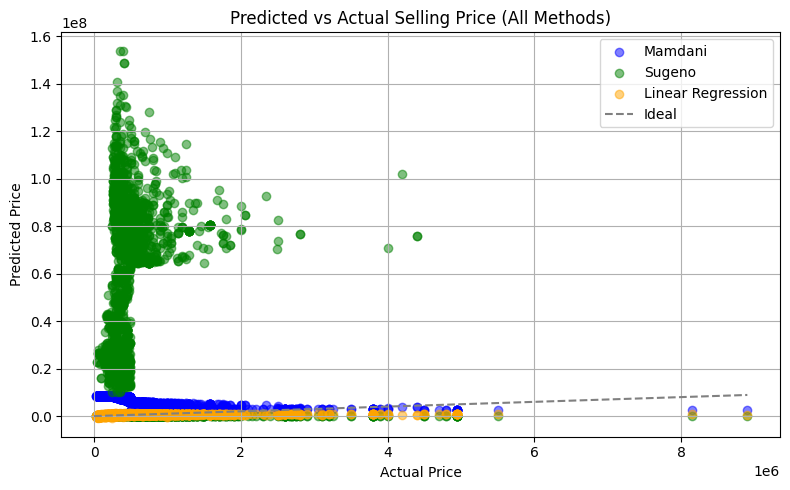

In [13]:
# VISUALIZE ALL RESULTS
# Scatter: Predicted vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(actuals, mamdani_preds, alpha=0.5, label='Mamdani', color='blue')
plt.scatter(actuals, sugeno_preds, alpha=0.5, label='Sugeno', color='green')
plt.scatter(actuals, y_pred, alpha=0.5, label='Linear Regression', color='orange')
plt.plot([0, max(actuals)], [0, max(actuals)], linestyle='--', color='gray', label='Ideal')
plt.title("Predicted vs Actual Selling Price (All Methods)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

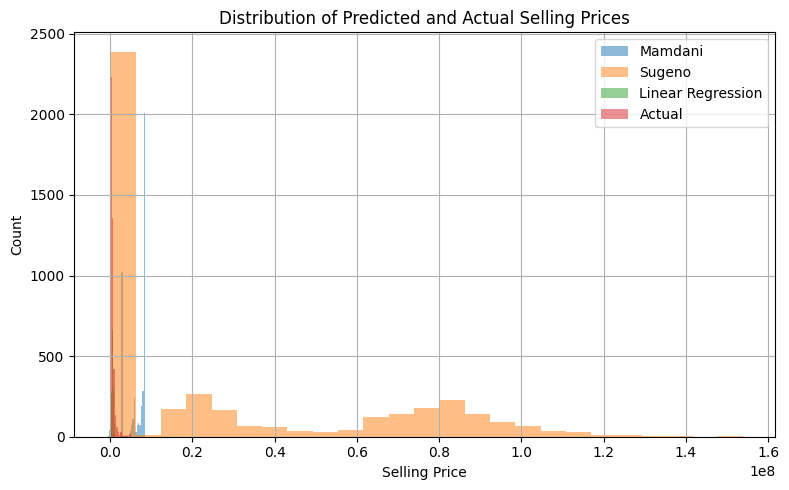

In [14]:
# Histogram: Distribution
plt.figure(figsize=(8, 5))
plt.hist(mamdani_preds, bins=25, alpha=0.5, label="Mamdani")
plt.hist(sugeno_preds, bins=25, alpha=0.5, label="Sugeno")
plt.hist(y_pred, bins=25, alpha=0.5, label="Linear Regression")
plt.hist(actuals, bins=25, alpha=0.5, label="Actual")
plt.title("Distribution of Predicted and Actual Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Please enter two indices between 0 and 4315


Index of first sample:  2
Index of second sample:  3


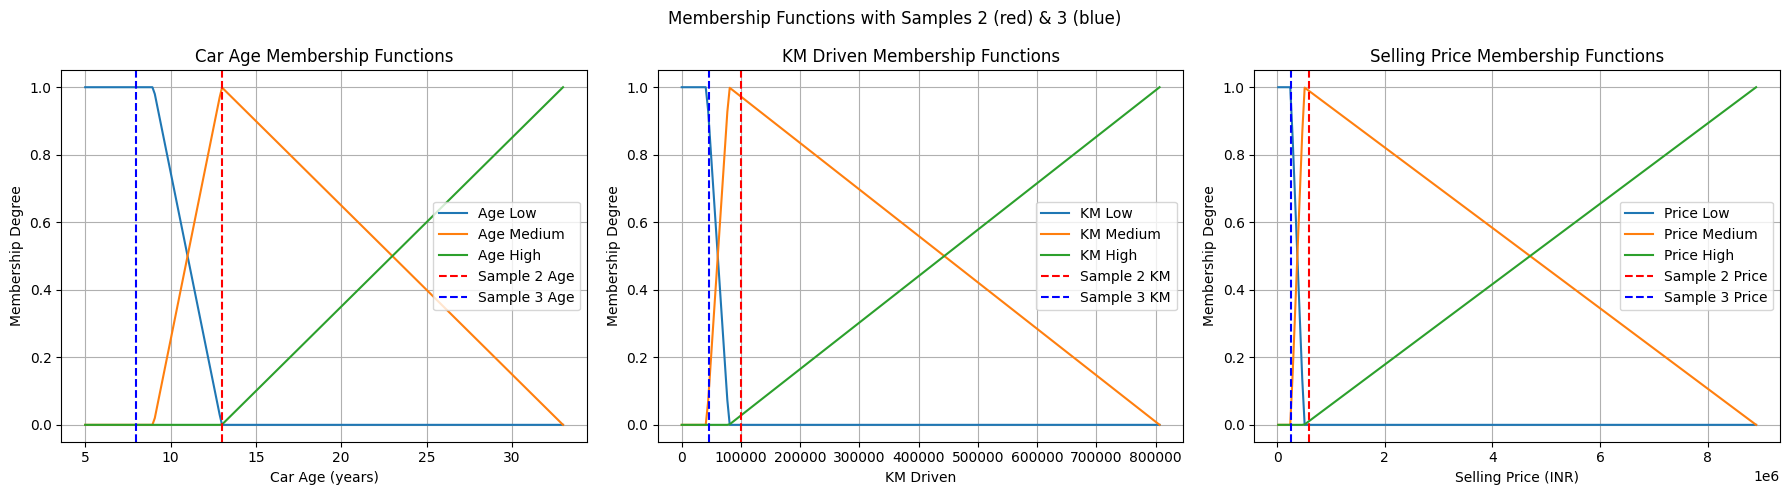


Comparison of Predictions:


,Sample Index,Actual Price,Mamdani Pred.,Sugeno Pred.
0,2,600000,5.905959e+06,88000000.0
1,3,250000,8.457395e+06,20600000.0


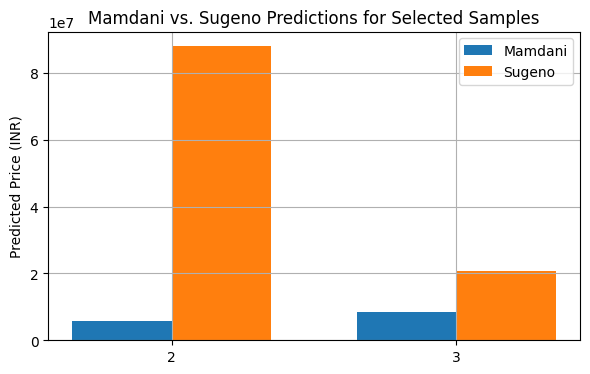

In [15]:
# === Compare Two User-Selected Samples with Membership Visualization ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 0) Ensure that final_df, all breakpoints, membership functions, and manual predict functions are already defined.

# 1) Prompt for two valid indices
n = len(final_df)
print(f"Please enter two indices between 0 and {n-1}")
idx1 = int(input("Index of first sample: "))
idx2 = int(input("Index of second sample: "))

# Basic validation
if not (0 <= idx1 < n and 0 <= idx2 < n):
    raise IndexError(f"indices must be in [0, {n-1}]")

# 2) Extract the two samples
samples = final_df.iloc[[idx1, idx2]].reset_index(drop=True)

# 3) Visualize Membership Functions with Sample Markers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Car Age membership
age_range = np.linspace(age_p0, age_p100, 200)
axes[0].plot(age_range, [age_low(x) for x in age_range], label='Age Low')
axes[0].plot(age_range, [age_med(x) for x in age_range], label='Age Medium')
axes[0].plot(age_range, [age_high(x) for x in age_range], label='Age High')
# Mark the two samples on the Car Age axis
age_vals = samples['Car_Age'].values
axes[0].axvline(age_vals[0], color='red', linestyle='--', label=f'Sample {idx1} Age')
axes[0].axvline(age_vals[1], color='blue', linestyle='--', label=f'Sample {idx2} Age')
axes[0].set_title("Car Age Membership Functions")
axes[0].set_xlabel("Car Age (years)")
axes[0].set_ylabel("Membership Degree")
axes[0].legend()
axes[0].grid(True)

# KM Driven membership
km_range = np.linspace(km_p0, km_p100, 200)
axes[1].plot(km_range, [km_low(x) for x in km_range], label='KM Low')
axes[1].plot(km_range, [km_med(x) for x in km_range], label='KM Medium')
axes[1].plot(km_range, [km_high(x) for x in km_range], label='KM High')
# Mark the two samples on the KM Driven axis
km_vals = samples['Km_Driven'].values
axes[1].axvline(km_vals[0], color='red', linestyle='--', label=f'Sample {idx1} KM')
axes[1].axvline(km_vals[1], color='blue', linestyle='--', label=f'Sample {idx2} KM')
axes[1].set_title("KM Driven Membership Functions")
axes[1].set_xlabel("KM Driven")
axes[1].set_ylabel("Membership Degree")
axes[1].legend()
axes[1].grid(True)

# Selling Price membership
price_range = np.linspace(price_p0, price_p100, 200)
axes[2].plot(price_range, [sp_low(x) for x in price_range], label='Price Low')
axes[2].plot(price_range, [sp_med(x) for x in price_range], label='Price Medium')
axes[2].plot(price_range, [sp_high(x) for x in price_range], label='Price High')
# Mark the two samples on the Selling Price axis
price_vals = samples['Selling_Price'].values
axes[2].axvline(price_vals[0], color='red', linestyle='--', label=f'Sample {idx1} Price')
axes[2].axvline(price_vals[1], color='blue', linestyle='--', label=f'Sample {idx2} Price')
axes[2].set_title("Selling Price Membership Functions")
axes[2].set_xlabel("Selling Price (INR)")
axes[2].set_ylabel("Membership Degree")
axes[2].legend()
axes[2].grid(True)

plt.suptitle(f"Membership Functions with Samples {idx1} (red) & {idx2} (blue)")
plt.tight_layout()
plt.show()

# 4) Compute Mamdani & Sugeno predictions for the two samples
results = {'Mamdani Pred.': [], 'Sugeno Pred.': []}
for idx, row in samples.iterrows():
    age   = row['Car_Age']
    km    = row['Km_Driven']
    price = row['Selling_Price']
    fuel  = row['Fuel_Type_Encoded']

    # Call the manual inference functions
    m_score = manual_mamdani_predict(age, km, price, fuel) * 1e7
    s_score = manual_sugeno_predict(age, km, price, fuel) * 1e7

    results['Mamdani Pred.'].append(m_score)
    results['Sugeno Pred.'].append(s_score)

# 5) Build comparison DataFrame
comp_df = pd.DataFrame({
    'Sample Index': [idx1, idx2],
    'Actual Price': samples['Selling_Price'],
    **results
})

print("\nComparison of Predictions:")
display(comp_df)

# 6) Bar-chart visualization of predictions
x = range(len(comp_df))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar([i - width/2 for i in x], comp_df['Mamdani Pred.'], width, label='Mamdani')
ax.bar([i + width/2 for i in x], comp_df['Sugeno Pred.'],  width, label='Sugeno')

ax.set_xticks(x)
ax.set_xticklabels(comp_df['Sample Index'])
ax.set_ylabel("Predicted Price (INR)")
ax.set_title("Mamdani vs. Sugeno Predictions for Selected Samples")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()